## Assignment 3

**Negin Baghbanzadeh**

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Question 1

The Capital Asset Pricing Model (CAPM) is a financial model that assumes returns on a portfolio are normally distributed.  Suppose a portfolio has an average annual return of 14.7% (i.e., an average gain on 14.7%) with a standard deviation of 33%.  A return of 0% means the value of the portfolio doesn't change, a negative return means that the portfolio loses money, and a positive return means that the portfolio gains money. Determine the following:

1. What percentage of years does this portfolio lose money, (i.e. have a return less than 0%)?
2. What is the cutoff for the highest 15% of annual returns with this portfolio?

See CAPM here https://en.wikipedia.org/wiki/Capital_asset_pricing_model 

#### PART 1

In [2]:
mu = 14.7
sigma = 33
normal_data = np.random.normal(mu, sigma, 10000)

/Users/Negin/opt/anaconda3/envs/Statistics/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


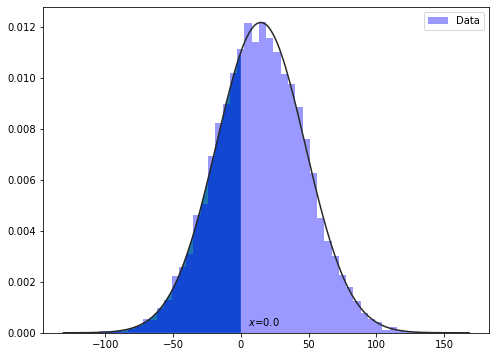

In [3]:
x = 0.0
plt.figure(figsize=(8,6))
sns.distplot(normal_data, label='Data', kde=False, 
             fit=stats.norm, color='b')
plt.text(x+5, .0003, '$x$='+str(x))

x_plot = np.linspace(min(normal_data), x, 1000)
y_plot = stats.norm.pdf(x_plot, mu, sigma)
plt.fill_between(x_plot,  y_plot)
c=plt.legend()

In [4]:
zscore = (x - mu) / sigma
zscore

-0.44545454545454544

In [5]:
p = stats.norm.cdf(zscore)
p*100

32.79956507031998

probability to get negative return is 32.8

#### PART 2

In [6]:
x_partA2 = 0
for x in range(round(max(normal_data))):
    zscore = (x - mu) / sigma
    p = stats.norm.cdf(zscore)
    if round(p*100) == 85:
        x_partA2 = x
        print("The cutoff for the highest 15% of annual returns with this portfolio is ", x)
        break

The cutoff for the highest 15% of annual returns with this portfolio is  49


/Users/Negin/opt/anaconda3/envs/Statistics/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


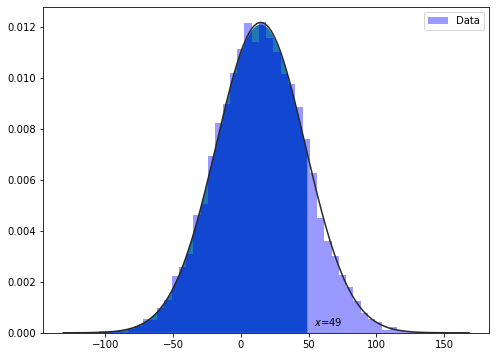

In [7]:
x = x_partA2
plt.figure(figsize=(8,6))
sns.distplot(normal_data, label='Data', kde=False, 
             fit=stats.norm, color='b')
plt.text(x+5, .0003, '$x$='+str(x))

x_plot = np.linspace(min(normal_data), x, 1000)
y_plot = stats.norm.pdf(x_plot, mu, sigma)
plt.fill_between(x_plot,  y_plot)
c=plt.legend()

## Question 2

Past experience indicates that because of low morale, a company loses 20 hours a year per employee due to lateness and abstenteeism.  Assume that the standard deviation of the population is 6 and normally distributed.

The HR department implemented a new rewards system to increase employee morale, and after a few months it collected a random sample of 20 employees and the annualized absenteeism was 14.

1. Could you confirm that the new rewards system was effective with a 90% confidence?
2. An HR subject matter expert would be very happy if the program could reduce absenteeism by 20% (i.e. to 16 hours).  Given the current sampling parameters (sample size of 20 and std. dev. of population. 6), what is the probability that the new rewards system reduced absenteeism to 16 hours and you miss it?
3. What should the sample size be if you want β to be 5%

#### PART 1
Here, the null hypothesis is that the new rewards system was not effective. The alternative hypothesis is that the new rewards system was effective. Thus, this is a one-tailed test, and for $\alpha=0.10$ the null hypothesis $H_0$ is rejected if the sample mean hours are in the lower 10% tail.

Following the standard protocol, we shall calculate the p-value for the observed sample mean. This p-value or probability to observe the given mean value or less can be found using the cumulative distribution function.

In [8]:
from math import sqrt

n_samples = 20
sigma = 6

se = sigma/sqrt(n_samples)

x = 14
mu=20

zscore = (x - mu) / se
zscore

-4.47213595499958

In [9]:
p_value= stats.norm.cdf(zscore)
print('P-value for given sample is ', p_value)

P-value for given sample is  3.872108215522035e-06


For this sample, we find a p-value = 3.872108215522035e-06 much smaller than the significance level $\alpha=0.1$. We may reject the null hypothesis and our conclusion is that the collected sample confirms the new rewards system was effective.

#### PART 2


In [10]:
mean_alt = 16
pop_mean = 20
n = 20
pop_stdev = 6
se = pop_stdev / np.sqrt(n)

x_crit = stats.norm.ppf(.10,loc=pop_mean, scale = se)
x_crit.round(3)

18.281

In [11]:
beta = 1 - (stats.norm.cdf(x_crit,loc=mean_alt,scale=se))
beta.round(2)

0.04

The β value is 0.04

#### Part 3

In [12]:
mean_alt = 16
pop_mean = 20
pop_stdev = 6
for n in range(1, 9999999):
    se = pop_stdev / np.sqrt(n)
    x_crit = stats.norm.ppf(.10,loc=pop_mean, scale = se)
    beta = 1 - (stats.norm.cdf(x_crit,loc=mean_alt,scale=se))
    if beta.round(2) == 0.05:
        print("The sample size should be", n, "for β to be 5%")
        break

The sample size should be 19 for β to be 5%


## Question 3

Chi-Square Goodness of fit

Please access and review **section 6.3.5** in the OpenIntro Statistics textbook:

Diez, D., Çetinkaya-Rundel, M. & Barr, C (2019). OpenIntro Statistics (4th Ed.). https://leanpub.com/openintro-statistics

Given the information in section 6.3.5, write python code for the following:

 - Calculate the expected values based on the geometric distribution with a probability of 53.2%
 - Compare the expected vs. the observed values from the textbook using the Chi-Square distribution
 - Reach a conclusion
 - Explain what is the business impact of your conclusion

In [13]:
from scipy.stats import chi2, chi2_contingency, chisquare

#### Part 1

In [14]:
probability = .545
def geometric_dist(day):
    return (((1-probability)**(day-1))*probability)*1362

In [15]:
geometric_model_values = []
for day in range(1, 8):
    value = 0
    if day == 7:
        new_day = day
        while(True):
            if round(geometric_dist(new_day)) == 0:
                break
            value += geometric_dist(new_day)
            new_day += 1
        geometric_model_values.append(round(value))
    else:
        geometric_model_values.append(round(geometric_dist(day)))
    if day == 1:
        print(day, "day:    ", geometric_model_values[day-1])
        continue
    if day == 7:
        print("7+ days:  ", geometric_model_values[day-1])
        continue
    print(day, "days:   ", geometric_model_values[day-1])

1 day:     742
2 days:    338
3 days:    154
4 days:    70
5 days:    32
6 days:    14
7+ days:   12


#### Part 2

In [16]:
chisquare([717, 369, 155, 69, 28, 14, 10], geometric_model_values)

Power_divergenceResult(statistic=4.539625879683935, pvalue=0.6040592872240453)

#### PArt 3
We could not reject the null hypothesis. Since p-value(0.6) is greater than alpha (1-CI = 1 - 0.95 = 0.05), we can say that geometric distribution can describe observed marked behaviour.

#### Part 4
The stock market being up or down on a given day is independent from all other days.